# 01: Cleaning & Exploratory Data Analysis
---

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

---
## 2. Data

In [2]:
ames_train = pd.read_csv('../data/train.csv')

In [3]:
ames_train

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


In [4]:
# Checking for null values

ames_train.isnull().sum().sort_values(ascending = False).loc[lambda x: x > 0]

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Qual        114
Garage Yr Blt      114
Garage Cond        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Garage Cars          1
dtype: int64

In [5]:
# Checking dtypes

ames_train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [6]:
# Replacing the null values in the categorical columns with 'NA' and in the numerical columns with 0

cat_cols = ames_train.select_dtypes(include=['object']).columns.tolist()
num_cols = ames_train.select_dtypes(include=['number']).columns.tolist()

ames_train[cat_cols] = ames_train[cat_cols].replace(np.nan, 'NA')
ames_train[num_cols] = ames_train[num_cols].replace(np.nan, 0)

In [7]:
# Changing the column names to snake case

ames_train.columns = ames_train.columns.str.lower().str.replace(' ', '_')

In [8]:
# Saving cleaned file to a CSV

ames_train.to_csv('../data/train_clean.csv', index=False)

---
## 3. Exploratory Data Analysis

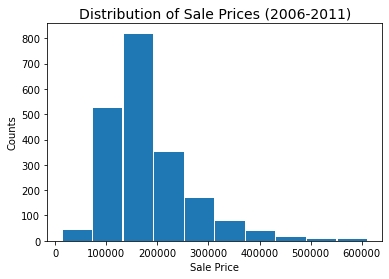

In [9]:
# Distribution of Sale Prices (2006-2011)

ames_train['saleprice'].hist(rwidth=0.96)

plt.title('Distribution of Sale Prices (2006-2011)', fontsize=14)
plt.xlabel('Sale Price')
plt.ylabel('Counts')
plt.grid(False);

The distribution of the sale prices is left-skewed and ranges from 0 to 600,000. The peak of the distribution seems to be in the 140,000-200,000 range, with about 800 sales, followed by the 75,000-130,000 range with just over 500 sales.

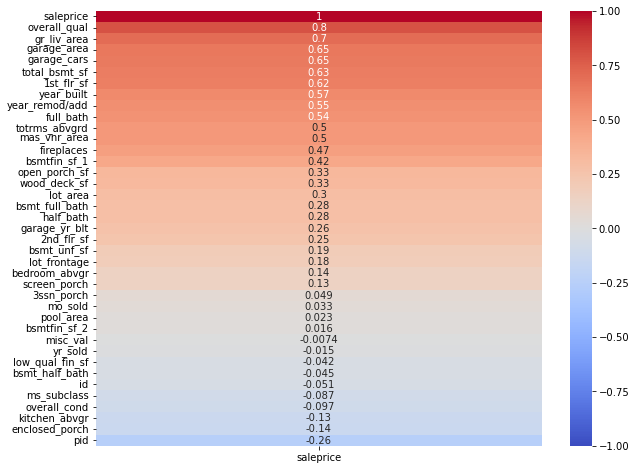

In [10]:
# Heatmap of the numerical features against the sale price

plt.figure(figsize=(10,8))
sns.heatmap(ames_train.corr()[['saleprice']].sort_values(by=['saleprice'], ascending=False), 
            vmin=-1, 
            vmax=1, 
            cmap='coolwarm', 
            annot=True);

This heatmap shows the correlations of each of the numerical features against the sale price. Ignoring sale price, which is of course perfectly correlated with sale price, the top highly correlated features are: overall quality (0.8), above ground living area (0.7), garage area (0.65), garage cars (0.65), total basement square footage (0.63), and first floor square footage (0.62). These features can be considered strong predictors of the sale price, and will be beneficial to include in the modeling stage.

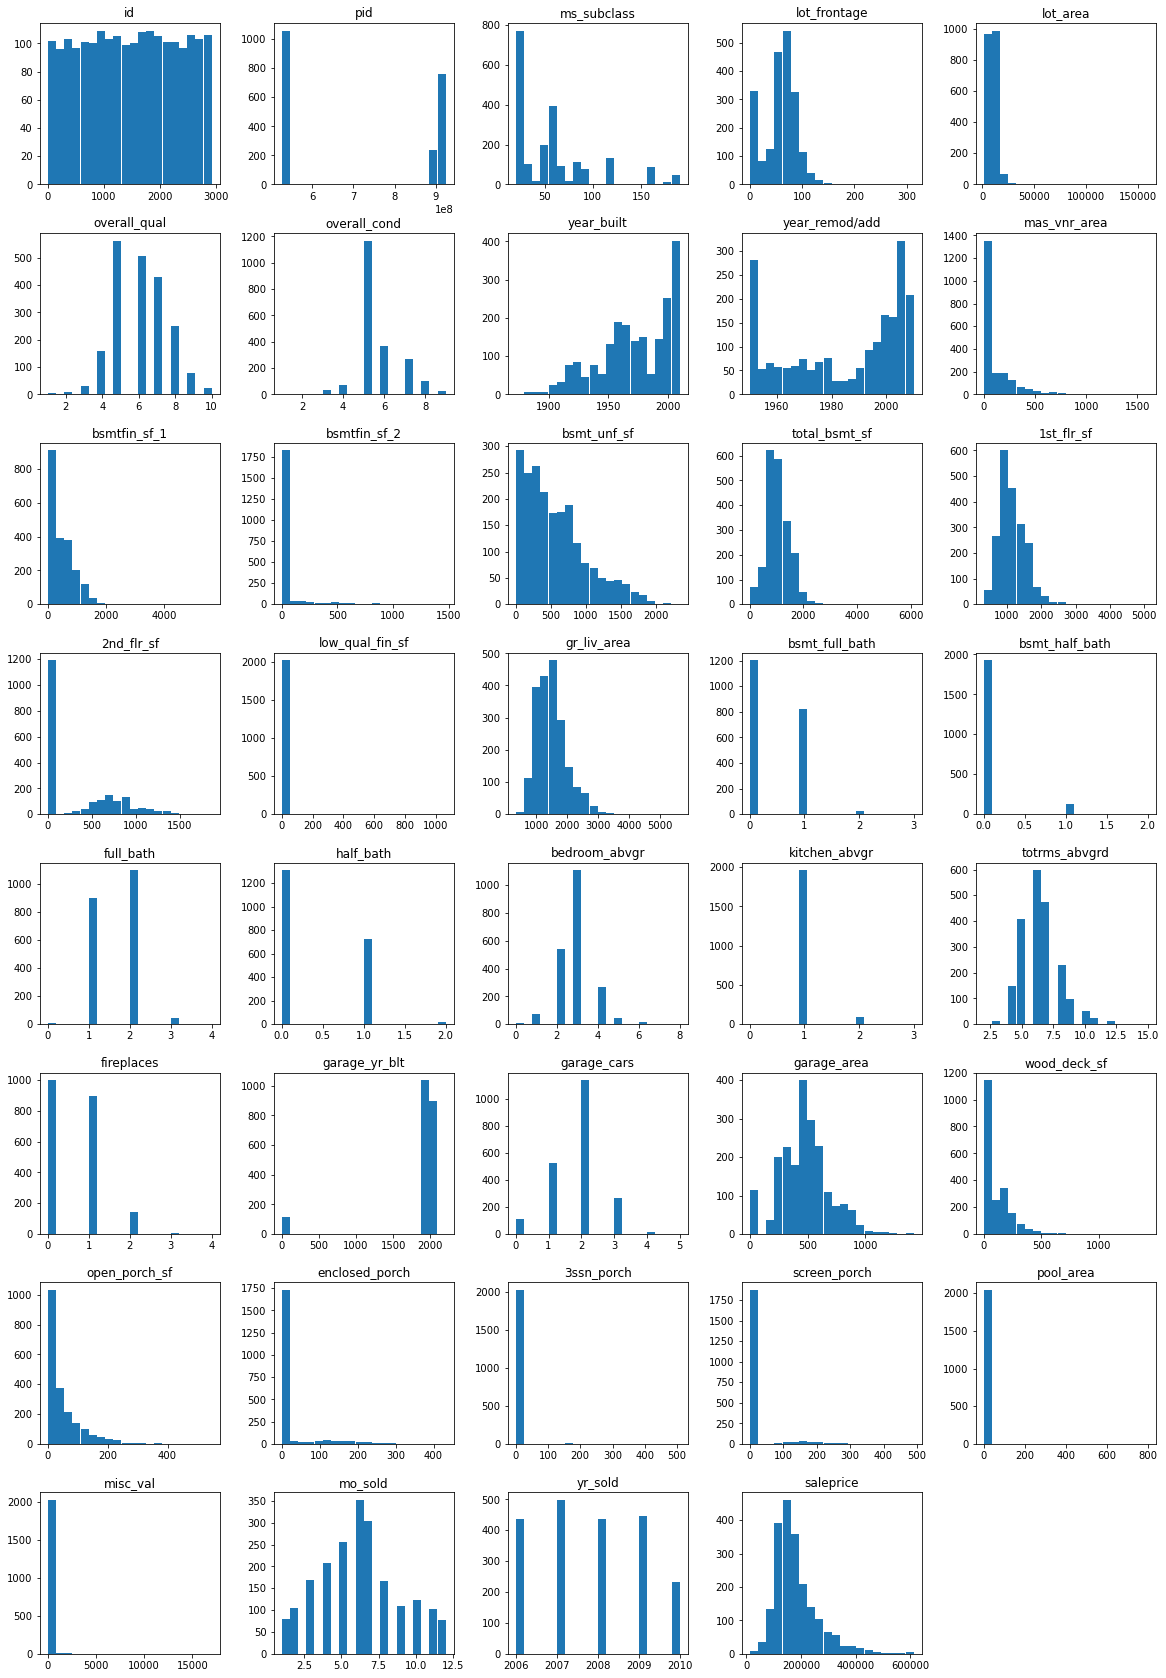

In [11]:
# Distribution of each of the numerical features

ames_train.hist(layout=(8,5), bins=20, figsize=(20,30), rwidth=0.96, grid=False);

To supplement the heatmap, plotting the distribution of each of the numerical columns provides a different perspective on which features will be useful. The more distribution present, the better chance the feature has of being a strong predictor. As in the heatmap, overall quality, above ground living area, garage area, garage cars, total basement square footage, and first floor square footage have good distributions. The year built and year remodeled/of additions fell lower on the correlation scale but also have good distributions and would make for good predictors.

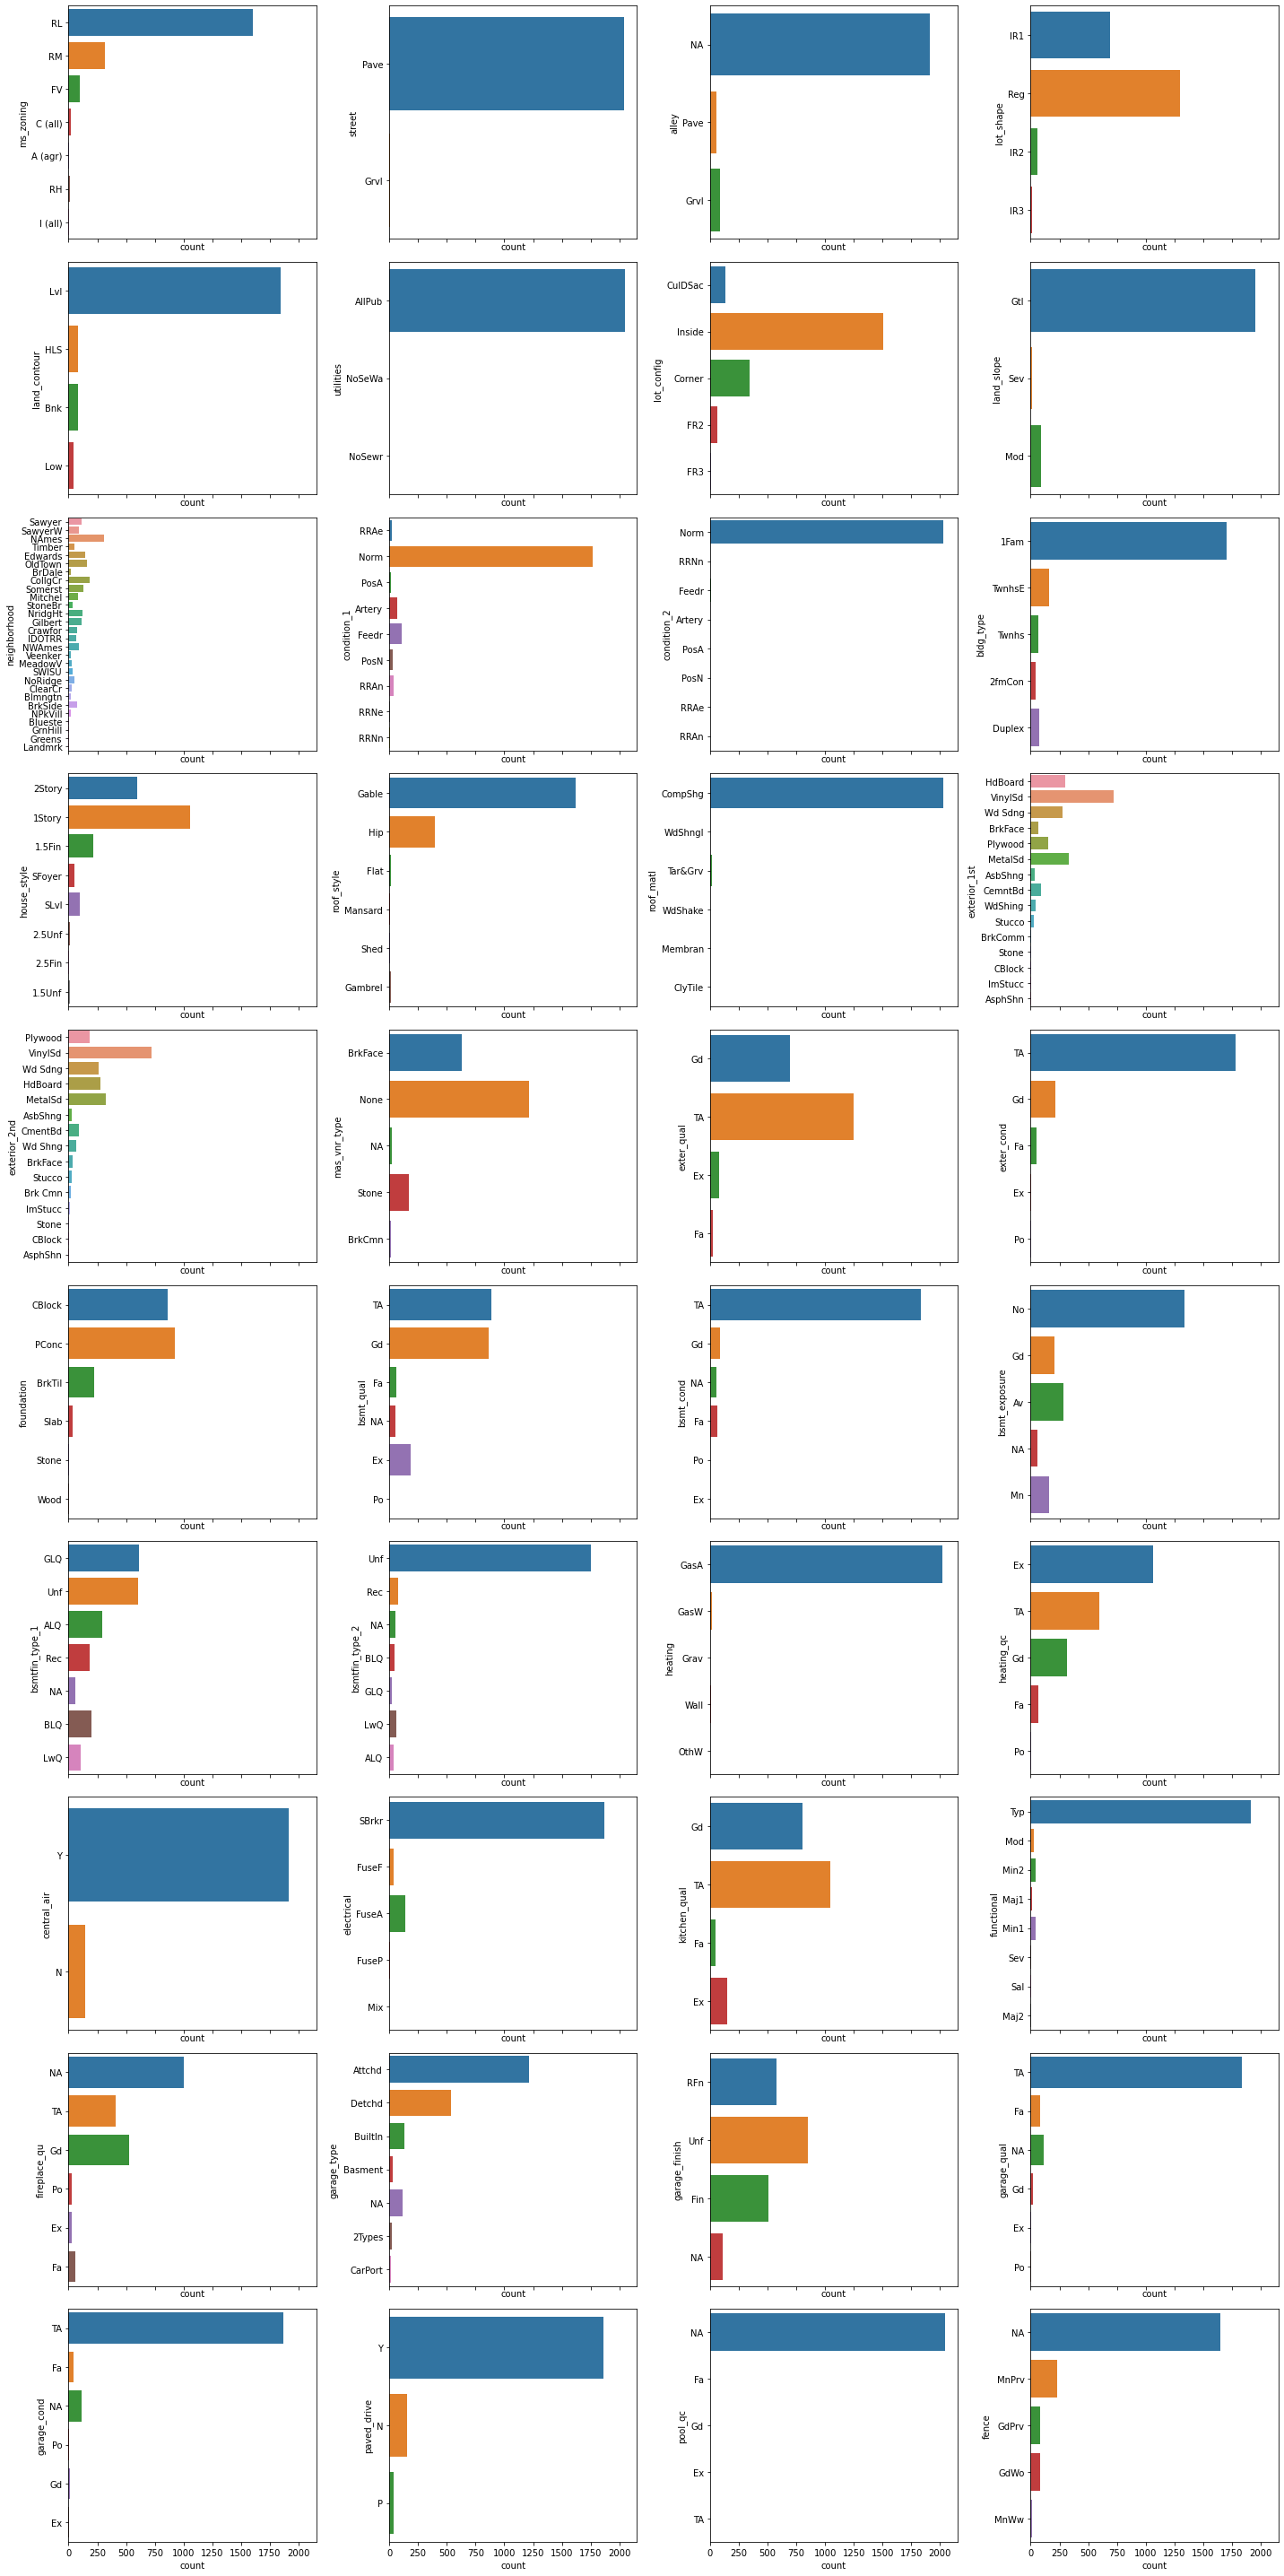

In [12]:
# Barcharts for each of the categorical features

fig, axes = plt.subplots(10,4, figsize=(20,40), sharex=True)

axes = axes.flatten()

object_cols = ames_train.dtypes == 'object'

for ax, catplot in zip(axes, ames_train.dtypes[object_cols].index):
    sns.countplot(y=catplot, data=ames_train, ax=ax)

plt.tight_layout()  
plt.show()

Similar to the distribution of the numerical features, the categorical feature barcharts provide a look into which features will be useful. The more variability, the better chance the feature has of being a strong predictor. Based on this, it seems that neighborhood, building type, house style, external qualities, basement details and garage details would make for good predictors.